**Name: Yutika Rege**

**PRN: 1901202012**

**School: Data Science**

**Program: B.Sc. Data Science**

**Year/Semester: 2nd / 4th**

**Subject Name: Machine Learning 2**

**Subject Code: DS401**

**Aim/Objective:** Predicting if the tumor is malignant or benign using k-NN classification algorithm.

**Apparatus/ Tools/Equipment/ Resources used:** Jupyter notebook, Lecture notes, Python and Machine Learning books, online resources from Google, dataset, Google Meet.

**Concept/Theory of Experiments:** 

1.	Exploratory data analysis

2.	k-Nearest Neighbor algorithm

**Procedure:** 

1.	Import the essential libraries.

2.	Perform EDA on the Breast cancer dataset. 

3.  Split the target feature for clustering from the independent feature.

4.  Train the data using k-NN classifier model.

5.  Note the performance metrics output.

**Observations/Calculation/Result:** In the Jupyter Notebook.

**Conclusion:** k-NN classification algorithm was applied on the Breast cancer dataset to predict if the tumor is malignant or benign and elbow method was applied to find optimal number of neighbors based on error rate.

-------------------------------------------------------------------------------------------------------------------------------

**Importing essential modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
%matplotlib inline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

**Reading the data:**

In [2]:
breast_cancer = pd.read_csv("breastcancer_orig.csv")
breast_cancer.head(4)

,id number,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2


**Exploratory data analysis:**

In [3]:
breast_cancer.shape

(699, 11)

In [4]:
breast_cancer.isna().sum().sum()

0

In [5]:
breast_cancer.columns

Index(['id number', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
breast_cancer.dtypes

id number                int64
Clump_Thickness          int64
Cell_Size                int64
Cell_Shape               int64
Marginal_Adhesion        int64
Epithelial_Cell_Size     int64
Bare_Nuclei             object
Bland_Chromatin          int64
Normal_Nucleoli          int64
Mitoses                  int64
Class                    int64
dtype: object

In [7]:
wanted_info = breast_cancer.iloc[:,1:]
wanted_info.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Epithelial_Cell_Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [8]:
cols = ['Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

print("Features and their unique values:\n")

for i in cols:
    print(f"{i}: {breast_cancer[i].unique()}\n")

Features and their unique values:

Clump_Thickness: [ 5  3  6  4  8  1  2  7 10  9]

Cell_Size: [ 1  4  8 10  2  3  7  5  6  9]

Cell_Shape: [ 1  4  8 10  2  3  5  6  7  9]

Marginal_Adhesion: [ 1  5  3  8 10  4  6  2  9  7]

Epithelial_Cell_Size: [ 2  7  3  1  6  4  5  8 10  9]

Bare_Nuclei: ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']

Bland_Chromatin: [ 3  9  1  2  4  5  7  8  6 10]

Normal_Nucleoli: [ 1  2  7  4  5  3 10  6  9  8]

Mitoses: [ 1  5  4  2  3  7 10  8  6]

Class: [2 4]



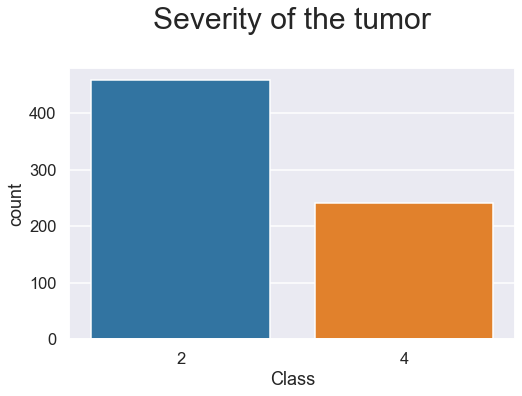

In [9]:
plt.figure(figsize=(8,5))
plt.title("Severity of the tumor\n",size=30)
sns.countplot(breast_cancer["Class"])

**Comments:** 

* There are 699 rows and 11 columns in the dataset those of which are: 'id number', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape','Marginal_Adhesion', 'Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses' and target feature - 'Class'. There are no missing values in the dataset. 

* The only variable with anomalous data is 'Bare_Nuclei' which is the only variable with an 'object' data type. It has '?' values as well which will be treated later. 

* More subjects have 'benign' tumor than 'malignant'.

**Feature engineering:**

In [10]:
breast_cancer["Bare_Nuclei"]=breast_cancer["Bare_Nuclei"].replace("?",np.nan)
breast_cancer.isna().sum().sum()

16

In [11]:
breast_cancer = breast_cancer.dropna()
breast_cancer.isna().sum().sum()

0

In [12]:
breast_cancer.shape

(683, 11)

In [13]:
breast_cancer["Bare_Nuclei"]=np.int64(breast_cancer["Bare_Nuclei"])

In [14]:
breast_cancer = breast_cancer.drop(["id number"],axis=1)

**Comment:** First, the values with "?" were replaced with np.nan and then these nan values were dropped. After that, the 'Bare_Nuclei' variable was converted to int64 data type. Lastly, the variable 'id number' was dropped since it was not essential towards prediction of our target feature.

Text(0.5, 1.0, 'Correlation matrix for the data\n')

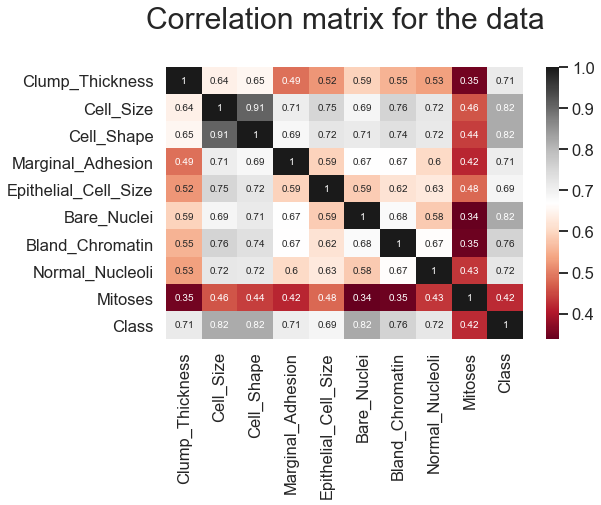

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(breast_cancer.corr(),cmap="RdGy",annot=True)
plt.title("Correlation matrix for the data\n",size=30)

**Comment:** All predictors share a strong positive correlation with the target feature hence we will be using the all-in feature selection method.

**Splitting the data into target and predictors:**

In [16]:
X = breast_cancer.iloc[:,:-1]
y = breast_cancer.iloc[:,-1]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)

In [18]:
X_train.shape

(455, 9)

In [19]:
X_test.shape

(228, 9)

**Choosing optimal k value for the number of neighbors as per error rate:**

In [20]:
error = []
for k in range(1,10):
    knn0 = KNeighborsClassifier(n_neighbors=k)
    knn0.fit(X_train,y_train)
    pred_k = knn0.predict(X_test)
    error.append(np.mean(pred_k != y_test))

err_en = []
for err in enumerate(error,1):
    err_en.append(err)
min(err_en,key=lambda x:x[1])

(6, 0.021929824561403508)

**Visualising using a line plot:**

Text(0, 0.5, 'Error rate')

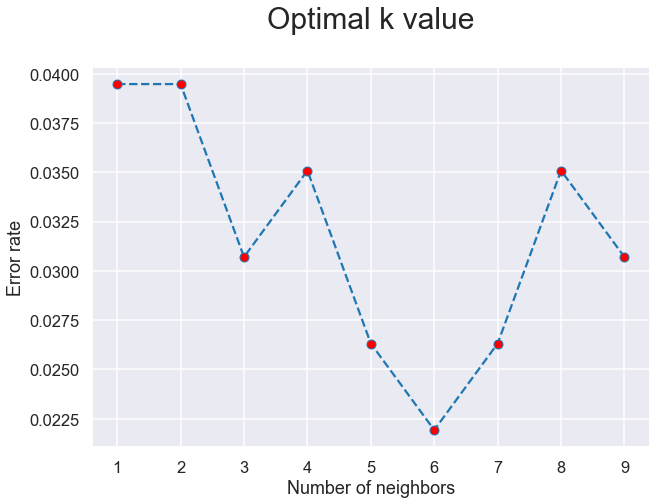

In [21]:
plt.figure(figsize=(10,7))
plt.plot(range(1,10),error,marker="o",markerfacecolor="r",linestyle="--")
plt.title("Optimal k value\n",size=30)
plt.xlabel("Number of neighbors")
plt.ylabel("Error rate")

**Comment:** The optimal k value was obtained by plotting a line plot.

**Training the data using k-Nearest Neighbor algorithm with no. of neigbors (k) = 6:**

In [29]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

* **Training data metrics:**

In [30]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       287
           4       0.98      0.96      0.97       168

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [31]:
print(confusion_matrix(y_pred_train,y_train))

[[284   3]
 [  6 162]]


* **Testing data metrics:**

In [32]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98       155
           4       0.96      0.97      0.97        73

    accuracy                           0.98       228
   macro avg       0.97      0.98      0.97       228
weighted avg       0.98      0.98      0.98       228



In [33]:
print(confusion_matrix(y_pred_test,y_test))

[[152   3]
 [  2  71]]


**Stratified k-Fold CV:**

In [34]:
skfold = StratifiedKFold(n_splits=10)
cv_score = cross_val_score(knn,X,y,cv=skfold)
pd.DataFrame(cv_score,columns=["Accuracy"])

,Accuracy
0,0.913043
1,0.956522
2,0.971014
3,0.941176
4,1.000000
5,0.970588
6,0.970588
7,1.000000
8,0.985294
9,0.985294


In [35]:
print(f"Maximum accuracy:{round((cv_score).max(),2)}\nMinimum accuracy:{round((cv_score).min(),2)}\nMean accuracy:{round((cv_score).mean(),2)}")

Maximum accuracy:1.0
Minimum accuracy:0.91
Mean accuracy:0.97


**Comment:** The accuracies of both training and testing data are 98 % which means that the model is performing exceptionally well. 

**Testing on datapoints:**

In [38]:
knn.predict([[8,10,10,8,7,10,9,7,1]])

array([4], dtype=int64)

**Comment:** The model has successfully predicted the tumor as being 'malignant'.